In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseVal"] = housing.target


In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
df = df[df['AveRooms'] < 50]

In [47]:
print("Sample data:\n", df.head())

# 2. Feature Selection & Engineering
# Select 1 feature for simplicity (e.g., average number of rooms)
X = df[["AveRooms", "HouseAge"]]
y = df["MedHouseVal"]

# Feature Engineering: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)




Sample data:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [49]:
# Show column names generated by PolynomialFeatures
poly_feature_names = poly.get_feature_names_out(["AveRooms", "HouseAge"])

# Convert to DataFrame
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Show first few rows
print(X_poly_df.head())

   AveRooms  HouseAge  AveRooms^2  AveRooms HouseAge  HouseAge^2  AveRooms^3  \
0  6.984127      41.0   48.778030         286.349206      1681.0  340.671954   
1  6.238137      21.0   38.914354         131.000879       441.0  242.753076   
2  8.288136      52.0   68.693192         430.983051      2704.0  569.338486   
3  5.817352      52.0   33.841580         302.502283      2704.0  196.868367   
4  6.281853      52.0   39.461681         326.656371      2704.0  247.892488   

   AveRooms^2 HouseAge  AveRooms HouseAge^2  HouseAge^3  
0          1999.899219         11740.317460     68921.0  
1           817.201439          2751.018453      9261.0  
2          3572.045964         22411.118644    140608.0  
3          1759.762140         15730.118721    140608.0  
4          2052.007394         16986.131274    140608.0  


In [27]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [28]:
len(y)

20631

In [29]:
print(len(y_train))
print(len(y_test))

16504
4127


In [30]:
# 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Assuming X_train is originally a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=poly_feature_names)

# Show first 5 rows
print(X_train_scaled_df.head())

   AveRooms  AveRooms^2
0 -0.221397   -0.152962
1  0.518190    0.152433
2  0.104024   -0.027956
3 -0.178791   -0.137433
4 -0.361773   -0.202339


In [32]:
# 5. Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)



In [33]:
# 6. Cost Function (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)



In [37]:
print(rmse)


1.107788603370868


In [38]:
# 7. R² Score
r2 = r2_score(y_test, y_pred)
print(r2)

0.071709255670803


In [35]:
# 8. Print Evaluation
print("\nModel Performance:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)




Model Performance:
Coefficients: [ 0.64362889 -0.48183274]
Intercept: 2.0695737857489145
Mean Squared Error (MSE): 1.2271955897583782
Root Mean Squared Error (RMSE): 1.107788603370868
R² Score: 0.071709255670803


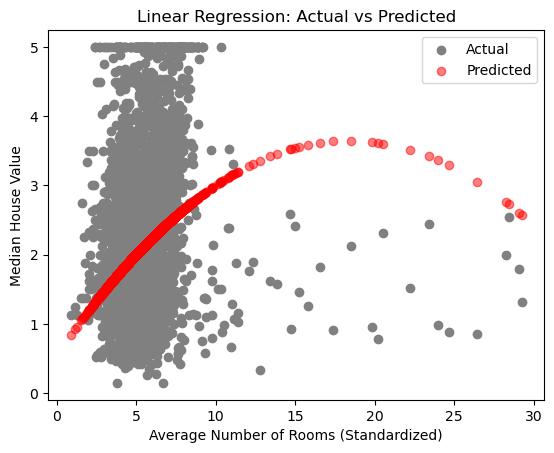

In [36]:
# 9. Visualization
plt.scatter(X_test[:, 0], y_test, color='gray', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel("Average Number of Rooms (Standardized)")
plt.ylabel("Median House Value")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [40]:
# Use only two features for simplicity
X = df[["AveRooms", "AveOccup"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [41]:
# ----------------------------
# Overfitting Example
# ----------------------------
# Use PolynomialFeatures to introduce non-linearity
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

# Predictions and performance
y_train_pred = linreg.predict(X_train_poly)
y_test_pred = linreg.predict(X_test_poly)

print("Linear Regression with Polynomial Features (degree=5)")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))



Linear Regression with Polynomial Features (degree=5)
Train MSE: 1.0729666901042754
Test MSE: 1.0890182371608965


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# ----------------------------
# Cross-Validation
# ----------------------------
cv_scores = cross_val_score(linreg, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nCross-Validation MSE (5 folds):", -cv_scores)
print("Average CV MSE:", -np.mean(cv_scores))




Cross-Validation MSE (5 folds): [2.93421473e+07 1.18387878e+01 1.07195787e+00 4.59672824e+12
 3.92261148e+04]
Average CV MSE: 919351524639.4075


In [45]:
# ----------------------------
# Regularization with Ridge
# ----------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_test_ridge_pred = ridge.predict(X_test_poly)

print("\nRidge Regression with Regularization")
print("Test MSE (Ridge):", mean_squared_error(y_test, y_test_ridge_pred))





Ridge Regression with Regularization
Test MSE (Ridge): 1.0885688622722782


/Users/nitinarora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.04279e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


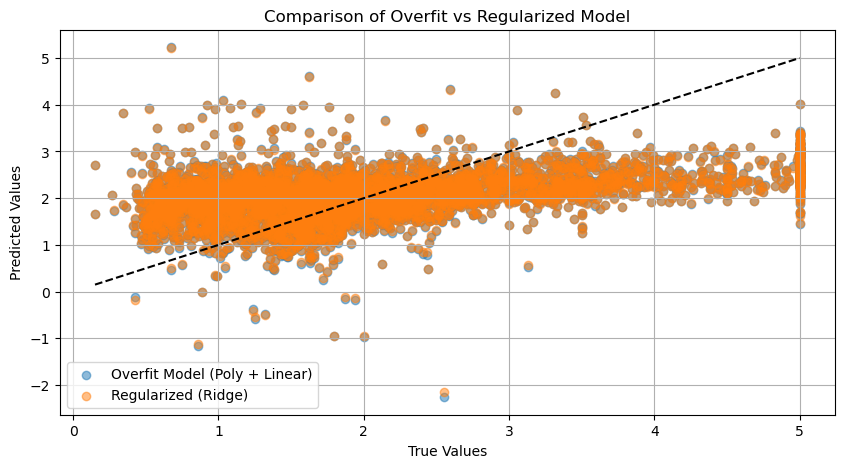

In [46]:
# ----------------------------
# Plotting Overfit vs Regularized
# ----------------------------
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, label='Overfit Model (Poly + Linear)', alpha=0.5)
plt.scatter(y_test, y_test_ridge_pred, label='Regularized (Ridge)', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of Overfit vs Regularized Model")
plt.legend()
plt.grid()
plt.show()